In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as st

# Import des données

In [3]:
customers = pd.read_csv('customers.csv')
products = pd.read_csv('products.csv')
transactions = pd.read_csv('transactions.csv')

# 1. Nettoyage des données

## Table customers

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [5]:
#Résumé statistique des données
print(customers.describe(include='all'))

       client_id   sex        birth
count       8623  8623  8623.000000
unique      8623     2          NaN
top       c_6887     f          NaN
freq           1  4491          NaN
mean         NaN   NaN  1978.280877
std          NaN   NaN    16.919535
min          NaN   NaN  1929.000000
25%          NaN   NaN  1966.000000
50%          NaN   NaN  1979.000000
75%          NaN   NaN  1992.000000
max          NaN   NaN  2004.000000


In [6]:
#Véification de la colonne client_id, recherche de valeurs singulières
customers.sort_values(["client_id"], axis=0, ascending=False, inplace=True)
customers.head(5)

,client_id,sex,birth
8494,ct_1,m,2001
2735,ct_0,f,2001
7358,c_999,m,1964
2145,c_998,m,2001
94,c_997,f,1994


In [7]:
#Présence de client_id distincts: ct_1, ct_0
#suppression des ct
customers.drop(customers.loc[customers['client_id']=='ct_1'].index, inplace=True)
customers.drop(customers.loc[customers['client_id']=='ct_0'].index, inplace=True)
#Recherche de valeurs nulles
customers.isnull().values.any()

False

In [8]:
#Nombre et proportion de femmes, nombre et proportion d'hommes
print(customers['sex'].value_counts())
print(customers['sex'].value_counts()/8621*100)

f    4490
m    4131
Name: sex, dtype: int64
f    52.082125
m    47.917875
Name: sex, dtype: float64


#### La table customers compte 4490 femmes et 4131 hommes, soit respectivement, 52% de femmes et 48% d'hommes

In [9]:
#Vérification de la colonne birth
#Recherche de valeurs nulles
print(customers["birth"].isnull())

7358    False
2145    False
94      False
2788    False
7004    False
        ...  
3426    False
8472    False
2137    False
6894    False
4299    False
Name: birth, Length: 8621, dtype: bool


In [10]:
#Création d'une colonne 'âge', à partir de la colonne birth
import datetime
time=datetime.datetime.now()
today = pd.to_datetime('today')
customers['age'] = today.year - customers['birth']
customers

,client_id,sex,birth,age
7358,c_999,m,1964,58
2145,c_998,m,2001,21
94,c_997,f,1994,28
2788,c_996,f,1970,52
7004,c_995,m,1955,67
...,...,...,...,...
3426,c_1001,m,1982,40
8472,c_1000,f,1966,56
2137,c_100,m,1992,30
6894,c_10,m,1956,66


In [11]:
#calcul de l'âge moyen
print(customers['age'].mean())

43.724393921818816


# Nettoyage de la table products

In [12]:
products.tail()

,id_prod,price,categ
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1
3286,0_1920,25.16,0


In [13]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [14]:
#Résumé statistique de la tabble products
print(products.describe(include='all'))


       id_prod        price        categ
count     3287  3287.000000  3287.000000
unique    3287          NaN          NaN
top      0_958          NaN          NaN
freq         1          NaN          NaN
mean       NaN    21.856641     0.370246
std        NaN    29.847908     0.615387
min        NaN    -1.000000     0.000000
25%        NaN     6.990000     0.000000
50%        NaN    13.060000     0.000000
75%        NaN    22.990000     1.000000
max        NaN   300.000000     2.000000


In [15]:
#Recherche de valeurs manquantes
products.isna().values.any()

False

In [16]:
#Recherche de valeurs aberrantes ou paiculières
print(products['price'].sort_values())

731      -1.00
2355      0.62
2272      0.62
370       0.66
1211      0.77
         ...  
2779    233.54
1436    236.99
394     247.22
724     254.44
947     300.00
Name: price, Length: 3287, dtype: float64


### Les valeurs extrêmes sont -1 € et 300€

In [17]:
#Voyons le nombre de produits vendus à un prix inférieur à 0.
val_inf_0= products[products["price"]<=0]["price"]

In [18]:
val_inf_0

731   -1.0
Name: price, dtype: float64

#### Il n'apparaît qu'un produit proposé à un prix inférieur à 0.

In [19]:
products.shape

(3287, 3)

In [20]:
#Retrait de la valeur <=0
products.drop(products.loc[products['price']<=0].index, inplace=True)

In [21]:
products.shape

(3286, 3)

In [22]:
print(products['price'].sort_values())

2272      0.62
2355      0.62
370       0.66
1211      0.77
1530      0.80
         ...  
2779    233.54
1436    236.99
394     247.22
724     254.44
947     300.00
Name: price, Length: 3286, dtype: float64


#### La suppression a fonctionné, car le nombre de lignes est passé de 3287 à 3286. Désomais, la valeur la plus petite est 0,62€

In [23]:
#Vérification de la colonne "id_prod"
#Recherche des valeurs uniques
id_prod_vérif = products['id_prod'].unique()

id_prod_vérif

array(['0_1421', '0_1368', '0_731', ..., '0_802', '1_140', '0_1920'],
      dtype=object)

In [24]:
#Recherche de valeurs singulières
products.sort_values("id_prod")

,id_prod,price,categ
1001,0_0,3.75,0
803,0_1,10.99,0
2691,0_10,17.95,0
663,0_100,20.60,0
922,0_1000,6.84,0
...,...,...,...
966,2_95,98.99,2
2576,2_96,47.91,2
2698,2_97,160.99,2
3088,2_98,149.74,2


### Vérification de la colonne categ


In [25]:
categ_vérif = products['categ'].unique()
categ_vérif

array([0, 1, 2], dtype=int64)

# Nettoyage de la table transactions

In [26]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     337016 non-null  object
 1   date        337016 non-null  object
 2   session_id  337016 non-null  object
 3   client_id   337016 non-null  object
dtypes: object(4)
memory usage: 10.3+ MB


In [27]:
#Les tables transactions et products matchent grâce à la clé id_prod, 
#on a déjà nettoyé la table products et on veut s'assurer que la colonne id-prod de la table transaction est aussi 
#propre que dans la table product. 
transactions['id_prod'][np.logical_not(transactions['id_prod'].isin(id_prod_vérif))]

1431         T_0
2365         T_0
2895         T_0
5955         T_0
6235      0_2245
           ...  
332730       T_0
333442       T_0
335279       T_0
335531    0_2245
336220    0_2245
Name: id_prod, Length: 303, dtype: object

In [28]:
#Remplacement de l'id_prod 0_2245 par une estimation de la moyenne des prix des produits 
#de la catégorie 0, car cet id_prod y est associé.
#L'id_prod T_0 a déjà été supprimé via la suppression des id_clients "ct".
#Calcul du prix moyen categ 0
prix_moy_cat_0 = round(np.mean(products.price[products.categ == 0]),0)
prix_moy_cat_0


12.0

#### La moyenne des prix des produits de la catégorie 0 est de 12€.

In [29]:
#Ajout de 12€ au produits ayant l'id_prod 0_2245 
products = products.append({'id_prod' : '0_2245', 'price' : prix_moy_cat_0 , 'categ' : 0}, ignore_index=True)
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,0_146,17.14,0
3283,0_802,11.22,0
3284,1_140,38.56,1
3285,0_1920,25.16,0


In [30]:
transactions.shape 

(337016, 4)

In [31]:
#Vérification de la colonne date
#Vérification de son type
transactions.date.dtype

dtype('O')

#### La colonne date est traitée comme un objet alors qu'elle est de type date.

In [32]:
#Recherche des valeurs manquantes. 
transactions.isna().values.any()

False

In [33]:
transactions.columns

Index(['id_prod', 'date', 'session_id', 'client_id'], dtype='object')

In [34]:
#Vérification de la colonne "client_id".
transactions['client_id'].value_counts().head(10)

c_1609    12855
c_6714     4473
c_3454     3275
c_4958     2562
c_2140      195
c_7959      195
c_8026      193
c_2595      193
c_3725      190
c_8392      189
Name: client_id, dtype: int64

In [35]:
#Le nombre de transactions des 4 premiers clients est excessif pae rapport à celui des autres. 


In [36]:
CA_vérif= transactions[["id_prod", "client_id"]]
CA_vérif_1=products[["id_prod", "price"]]
Ca_vérif_jointure=CA_vérif.merge(CA_vérif_1 , on =['id_prod'], how="inner")
Ca_vérif_jointure

,id_prod,client_id,price
0,0_1483,c_4450,4.99
1,0_1483,c_1576,4.99
2,0_1483,c_182,4.99
3,0_1483,c_1196,4.99
4,0_1483,c_2890,4.99
...,...,...,...
336811,0_1683,c_5508,2.99
336812,2_98,c_5967,149.74
336813,0_833,c_8260,2.99
336814,0_1284,c_1551,1.38


In [37]:
#création d'une liste
CA_vérif_2= ("c_1609", "c_6714" , "c_3454",  "c_4958")

In [38]:
#vérification si présence des  4 clients de la liste suscréée dans la nouvelle table
#et enregistrement de ces derniers dans une variable.
CA_vérif_3 = Ca_vérif_jointure.loc[Ca_vérif_jointure["client_id"].isin(CA_vérif_2)]

#Calcul du CA produit par les clients
CA_V=CA_vérif_3.price.sum()

#Calcul de la proportion du CA généré par les 4 clients par rapport au chiffre d'affaire global.
CA_V_1= CA_vérif_3.price.sum()/Ca_vérif_jointure.price.sum()
CA_V

433952.81

In [39]:
CA_V_1*100

7.4847662794108665

#### Le CA des clients_id "c_1609", "c_6714" , "c_3454",  "c_4958" est de 43400.81€, soit environs 7% du CA global. 
#### Cette proportion est très importante car elle ne concerne que 4 clients. Je fais donc le choix de cupprimer ces deniers. 



In [40]:
transactions.shape

(337016, 4)

In [41]:

#Retrait des clients au client_id trop élevé, car le poids du CA de ces clients pèserait trop dans le CA  global
#c_1609 
#c_6714 
#c_3454 
#c_4958 

transactions.drop(transactions.loc[transactions['client_id']=='c_1609'].index, inplace=True)
transactions.drop(transactions.loc[transactions['client_id']=='c_6714'].index, inplace=True)
transactions.drop(transactions.loc[transactions['client_id']=='c_3454'].index, inplace=True)
transactions.drop(transactions.loc[transactions['client_id']=='c_4958'].index, inplace=True)
transactions.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [42]:
transactions.shape

(313851, 4)

In [43]:
# Modification du type de la variable date 
transactions.date = pd.to_datetime(transactions.date,
              format="%Y-%m-%d %H:%M:%S.%f",                         
              errors="coerce")
transactions['date'] = pd.to_datetime(transactions['date']).dt.normalize()
transactions.dtypes
sum(transactions.date.isnull())
transactions["date1"]=transactions["date"].dt.strftime("%d/%m/%Y")
transactions["date_year"]=transactions["date"].dt.year
transactions["date_month"]=transactions["date"].dt.month
transactions.head()

,id_prod,date,session_id,client_id,date1,date_year,date_month
0,0_1483,2021-04-10,s_18746,c_4450,10/04/2021,2021.0,4.0
1,2_226,2022-02-03,s_159142,c_277,03/02/2022,2022.0,2.0
2,1_374,2021-09-23,s_94290,c_4270,23/09/2021,2021.0,9.0
3,0_2186,2021-10-17,s_105936,c_4597,17/10/2021,2021.0,10.0
4,0_1351,2021-07-17,s_63642,c_1242,17/07/2021,2021.0,7.0


In [44]:
#Recherche des valeurs manquantes

In [45]:
 transactions.isna().sum()

id_prod         0
date          200
session_id      0
client_id       0
date1         200
date_year     200
date_month    200
dtype: int64

In [46]:
date_change=transactions[["date","date1","date_year", "date_month", "id_prod"]]
date_change.isna().values.any()

True

In [47]:
transactions.index[transactions.isnull().any(axis=1)]

Int64Index([  1431,   2365,   2895,   5955,   7283,  13745,  20470,  22347,
             26359,  26407,
            ...
            328925, 329634, 330454, 331787, 332163, 332594, 332705, 332730,
            333442, 335279],
           dtype='int64', length=200)

In [48]:
index_with_nan = transactions.index[transactions.isnull().any(axis=1)]
index_with_nan.shape


(200,)

In [49]:
#suppession des erreurs qui, en réalité, sont liées au clients CT 
transactions.drop(index_with_nan,0, inplace=True)
transactions.shape

(313651, 7)

### Mission 2: Analyse des ventes à partir d'une nouvelle table (Ventes) créée par la jointure des trois tables

In [50]:
Ventes=transactions.merge(products , on =['id_prod'], how="inner")
Ventes

,id_prod,date,session_id,client_id,date1,date_year,date_month,price,categ
0,0_1483,2021-04-10,s_18746,c_4450,10/04/2021,2021.0,4.0,4.99,0
1,0_1483,2021-10-18,s_106741,c_1576,18/10/2021,2021.0,10.0,4.99,0
2,0_1483,2021-11-14,s_119491,c_182,14/11/2021,2021.0,11.0,4.99,0
3,0_1483,2021-07-30,s_69222,c_1196,30/07/2021,2021.0,7.0,4.99,0
4,0_1483,2021-03-30,s_13545,c_2890,30/03/2021,2021.0,3.0,4.99,0
...,...,...,...,...,...,...,...,...,...
313646,0_833,2021-09-27,s_96558,c_8260,27/09/2021,2021.0,9.0,2.99,0
313647,0_1284,2021-04-14,s_20477,c_1551,14/04/2021,2021.0,4.0,1.38,0
313648,0_1116,2021-07-27,s_67633,c_3291,27/07/2021,2021.0,7.0,2.97,0
313649,0_527,2021-08-08,s_73115,c_131,08/08/2021,2021.0,8.0,2.99,0


In [51]:
# Seconde jointure, entre les tables Ventes et customers
ventes=Ventes.merge(customers,left_on="client_id", right_on="client_id",how="inner")
ventes['age'] = today.year - ventes['birth']
ventes

,id_prod,date,session_id,client_id,date1,date_year,date_month,price,categ,sex,birth,age
0,0_1483,2021-04-10,s_18746,c_4450,10/04/2021,2021.0,4.0,4.99,0,f,1977,45
1,0_1085,2021-09-29,s_97382,c_4450,29/09/2021,2021.0,9.0,3.99,0,f,1977,45
2,0_1453,2021-08-27,s_81509,c_4450,27/08/2021,2021.0,8.0,7.99,0,f,1977,45
3,0_1405,2021-08-27,s_81509,c_4450,27/08/2021,2021.0,8.0,4.99,0,f,1977,45
4,0_1392,2021-12-28,s_141302,c_4450,28/12/2021,2021.0,12.0,6.30,0,f,1977,45
...,...,...,...,...,...,...,...,...,...,...,...,...
313646,0_2075,2021-10-09,s_102200,c_2793,09/10/2021,2021.0,10.0,8.99,0,m,1933,89
313647,0_1692,2021-09-15,s_90430,c_4478,15/09/2021,2021.0,9.0,13.36,0,f,1970,52
313648,2_162,2021-06-03,s_43342,c_755,03/06/2021,2021.0,6.0,102.82,2,f,1996,26
313649,2_213,2021-12-31,s_142586,c_755,31/12/2021,2021.0,12.0,189.99,2,f,1996,26


In [52]:
ventes.isna().values.any()

False

In [53]:
#Nombre total de valeurs manquantes
print(ventes.isnull().sum().sum())


0


In [54]:
ventes.describe

<bound method NDFrame.describe of        id_prod       date session_id client_id       date1  date_year  \
0       0_1483 2021-04-10    s_18746    c_4450  10/04/2021     2021.0   
1       0_1085 2021-09-29    s_97382    c_4450  29/09/2021     2021.0   
2       0_1453 2021-08-27    s_81509    c_4450  27/08/2021     2021.0   
3       0_1405 2021-08-27    s_81509    c_4450  27/08/2021     2021.0   
4       0_1392 2021-12-28   s_141302    c_4450  28/12/2021     2021.0   
...        ...        ...        ...       ...         ...        ...   
313646  0_2075 2021-10-09   s_102200    c_2793  09/10/2021     2021.0   
313647  0_1692 2021-09-15    s_90430    c_4478  15/09/2021     2021.0   
313648   2_162 2021-06-03    s_43342     c_755  03/06/2021     2021.0   
313649   2_213 2021-12-31   s_142586     c_755  31/12/2021     2021.0   
313650   0_142 2021-09-25    s_95415    c_1232  25/09/2021     2021.0   

        date_month   price  categ sex  birth  age  
0              4.0    4.99      0   f

In [55]:
#Résumé de la table ventes
ventes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313651 entries, 0 to 313650
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     313651 non-null  object        
 1   date        313651 non-null  datetime64[ns]
 2   session_id  313651 non-null  object        
 3   client_id   313651 non-null  object        
 4   date1       313651 non-null  object        
 5   date_year   313651 non-null  float64       
 6   date_month  313651 non-null  float64       
 7   price       313651 non-null  float64       
 8   categ       313651 non-null  int64         
 9   sex         313651 non-null  object        
 10  birth       313651 non-null  int64         
 11  age         313651 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 31.1+ MB


In [56]:
#Création d'une copie de Ventes, au cas où j'aurais besoin de revenir à la table d'origine.
VENTES= ventes

In [57]:
ventes.index[ventes.isnull().any(axis=1)]

Int64Index([], dtype='int64')

# Calcul du CA annuel

In [58]:
Ca_a=ventes[["date_year","price"]]
CA_a= Ca_a.groupby(["date_year"]).sum(["price"])

CA_a.reset_index()

,date_year,price
0,2021.0,4.386997e+06
1,2022.0,9.768639e+05


### Le ca de l'année 2021 est de 4388117.57 euros
### Le ca de l'année 2022 est de 977 079,9 euros

In [59]:
#Visualisation du CA 2021
#Création de la table CA de l'année 2021
#D'abord, création d'un double filtre
CA_21=ventes[(ventes["date_year"]==2021)& (ventes["price"])>0]
#Création d'une table en sélectionnant les colonnes qui m'intéressent pour calculer le CA 2021
CA_21_1=CA_21[['date_year','price','date_month']]
CA_21_1

,date_year,price,date_month
0,2021.0,4.99,4.0
1,2021.0,3.99,9.0
2,2021.0,7.99,8.0
3,2021.0,4.99,8.0
4,2021.0,6.30,12.0
...,...,...,...
313646,2021.0,8.99,10.0
313647,2021.0,13.36,9.0
313648,2021.0,102.82,6.0
313649,2021.0,189.99,12.0


<function matplotlib.pyplot.show(close=None, block=None)>

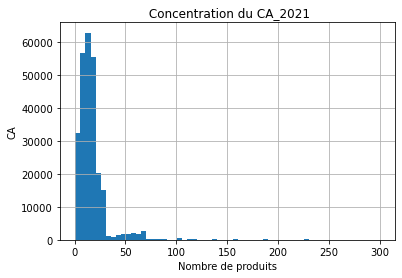

In [60]:
#Visualisaion effective du CA 2021
CA_21_1['price'].hist(bins = 60)
plt.title(" Concentration du CA_2021")
plt.xlabel("Nombre de produits")
plt.ylabel("CA")
plt.show

#### Ce graphique permet de savoir qu'une faible quantité de produits, moins de 40, concentre une majorité du CA de l'année 2021. 
#### Plus le nombre de produits augmente, plus le CA est bas voire, proche de 0. 

In [61]:
#Visualisation du CA  de l'année 2022 
#D'abord, double filtre dans la table ventes

CA_22=ventes[(ventes["date_year"]==2022)& (ventes["price"])>0]
CA_22_1=CA_22[['date_year','price']]
CA_22_1

,date_year,price
6,2022.0,10.70
7,2022.0,10.70
16,2022.0,15.59
18,2022.0,15.99
19,2022.0,18.99
...,...,...
313631,2022.0,90.99
313632,2022.0,16.99
313633,2022.0,123.99
313636,2022.0,103.99


In [62]:
#Calcul effectif du CA de l'année 2022
CA_A22=CA_22_1["price"].sum()
CA_A22

976863.89

<function matplotlib.pyplot.show(close=None, block=None)>

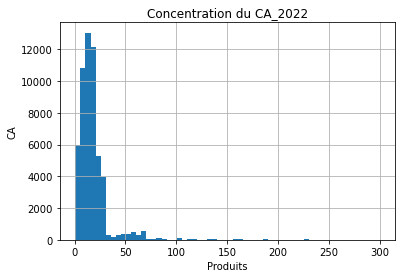

In [63]:
#Visualisation de ce CA au travers d'un histogramme permettant de voir s'il y a une concentration des prix.
CA_22_1['price'].hist(bins = 60)
plt.title("Concentration du CA_2022")
plt.xlabel("Produits")
plt.ylabel("CA")
plt.show

#### Graphique de concentration, son intérêt est de montrer qu'une infime quantité de produits contribue fortement au chiffre d'affaire
#### Dans l'histogramme. Concentration du CA_2022: on note que moins de 50 produits, toutes catégories confondues, contribuent 
####  fortement au CA réalisé en 2022.


# Evolution du CA annuel

In [64]:
Evol_ca_month=ventes.groupby(["date_month"]).agg({"price":"sum"})
Evol_ca_month.reset_index()
Evol_ca_month.index = ['1', '2', '3', '4','5','6','7','8','9','10','11','12']
Evol_ca_month

,price
1,486635.38
2,490228.51
3,443047.11
4,436341.27
5,451407.94
6,444939.47
7,445704.41
8,443279.68
9,466894.36
10,295322.55


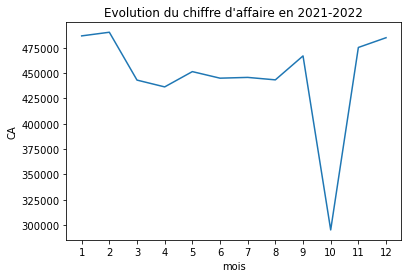

In [65]:
graphique_1 = plt.figure()
ax = plt.axes()
x = Evol_ca_month.price
plt.title("Evolution du chiffre d'affaire en 2021-2022")
plt.ylabel("CA")
plt.xlabel("mois")

ax.plot(x)

In [66]:
#Pas de supression du CA du mois d'octobre, car j'ignore l'origine de la baisse du CA, 
#C'est ce que je vais essayer de comprendre.


In [67]:
#A partir de la table ventes, création d'une table pour observer le CA du mois d'octobre
Ca_oct=ventes[['date_month','categ','price']]

#Double filtres sur la table créée. 
ca_oct_cat=Ca_oct[(Ca_oct["date_month"]==10)&(Ca_oct["price"])>0 &(Ca_oct["categ"])]
ca_oct_cat

,date_month,categ,price
28,10.0,0,12.53
68,10.0,0,3.99
72,10.0,0,4.99
82,10.0,0,12.71
98,10.0,1,8.58
...,...,...,...
313567,10.0,0,4.99
313598,10.0,0,8.99
313615,10.0,1,24.67
313620,10.0,0,6.31


In [68]:
ca_oct_cat.categ.value_counts()

0    17414
1     1571
2     1058
Name: categ, dtype: int64

### Représentation graphique de la distribution du CA d'octobre 2021 par catégorie de produit

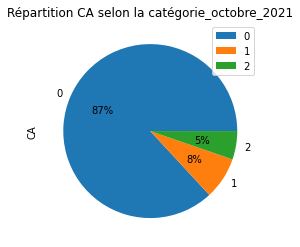

In [69]:
ca_oct_cat['categ'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%')
plt.title("Répartition CA selon la catégorie_octobre_2021")
plt.ylabel("CA")
plt.legend()
plt.show()

In [70]:
# Il est toujours intéressant de mettre les données en perpective en les comparant. 
# Ici, je vais comparer la distribution du CA par catégorie du mois d'octobre avec celui de janvier et de mai.

In [71]:
Ca_janv=ventes[['date_month','categ','price']]
Ca_janv_cat=Ca_janv[(Ca_janv["date_month"]==1)& (Ca_janv["price"])>0 & (Ca_janv["categ"])]

Ca_janv_cat

,date_month,categ,price
6,1.0,0,10.70
16,1.0,1,15.59
18,1.0,1,15.99
19,1.0,0,18.99
69,1.0,0,3.99
...,...,...,...
313559,1.0,1,37.20
313603,1.0,1,15.99
313608,1.0,0,7.99
313631,1.0,2,90.99


In [72]:
Ca_janv_cat.categ.value_counts()

0    14395
1    11748
2     1248
Name: categ, dtype: int64

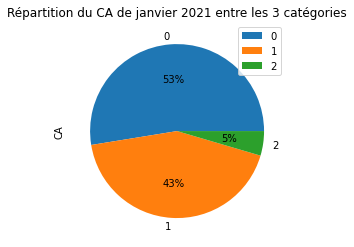

In [73]:
Ca_janv_cat['categ'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%')
#plt.ylabel("")
plt.title("Répartition du CA de janvier 2021 entre les 3 catégories")
plt.ylabel("CA")
plt.legend()
plt.show()

In [74]:

Ca_mai_cat=Ca_janv[(Ca_janv["date_month"]==5)& (Ca_janv["price"])>0 & (Ca_janv["categ"])]

Ca_mai_cat

,date_month,categ,price
34,5.0,0,4.99
45,5.0,1,21.99
46,5.0,0,9.66
47,5.0,0,9.66
53,5.0,0,7.56
...,...,...,...
313575,5.0,2,50.99
313581,5.0,0,11.99
313583,5.0,1,24.67
313585,5.0,2,104.06


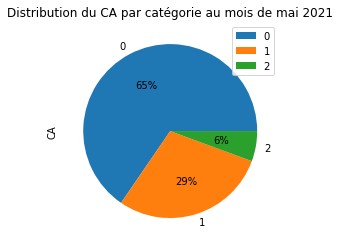

In [75]:
Ca_mai_cat['categ'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%')
#plt.ylabel("")
plt.title("Distribution du CA par catégorie au mois de mai 2021")
plt.ylabel("CA")
plt.legend()
plt.show()

####  Les trois graphiques montrent que les produits de catégorie 2 contribuent moins que ceux des autres catégories au CA global. On retrouve cette récurrence en octobre, mais on constate également que les produits de catégories 1 sont beaucoup moins nombreux pour ce dernier mois.  La baisse   du CA en octobre peut donc s'expliquer par de  faibles quantités de produits de catégories 1 et 2 et par leur faible contribution au CA du mois d'octobre 2021.

# Répartition du CA selon le sexe


In [76]:
ca_sex=ventes.groupby(["sex","client_id"]).agg({"price":"sum"})
ca_sex.reset_index()

,sex,client_id,price
0,f,c_1000,980.02
1,f,c_1002,298.65
2,f,c_1005,476.67
3,f,c_1007,299.34
4,f,c_1009,298.64
...,...,...,...
8591,m,c_991,326.41
8592,m,c_993,217.85
8593,m,c_995,119.08
8594,m,c_998,1527.69


<function matplotlib.pyplot.show(close=None, block=None)>

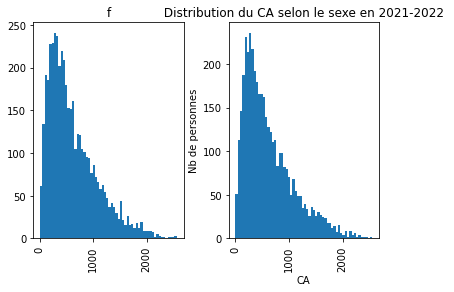

In [77]:
ca_sex.hist(by="sex",bins = 60)
plt.title(" Distribution du CA selon le sexe en 2021-2022 ")
plt.xlabel("CA")
plt.ylabel("Nb de personnes")

plt.show


#### pour confirmer ce résultat, la boxplot suivante permet de voir les chiffres sur un autre angle et de confirmer ce que montre l'histogramme de distribution du CA selon le sexe, soit une faible différence de CA entre femmes et hommes. 


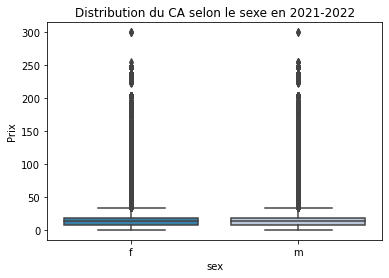

In [78]:
#Nous avons deux variables: l'une quantitative et l'autre qualitative et nous voulons observer la répartition de
#l'une sur lautre. La boîte à moustache convient pour représenter la distribution de l'une sur l'autre
sns.boxplot(data=ventes, x=ventes["sex"], y=ventes["price"], palette="PuBu_r")
plt.title("Distribution du CA selon le sexe en 2021-2022")
plt.ylabel("Prix")

plt.show()

# Répartition du ca annuel selon la catégorie de produit

In [79]:
#nombre de produits par catégorie  
ventes.categ.value_counts()

0    195270
1    102625
2     15756
Name: categ, dtype: int64

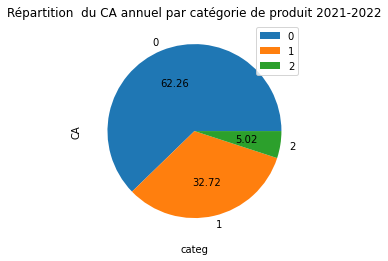

In [80]:
ventes['categ'].value_counts(normalize=True).plot(kind='pie',autopct='%.2f')
plt.tick_params(axis = 'both', which = 'major', labelsize = 30)
plt.xlabel("categ")
plt.ylabel("CA")
plt.title("Répartition  du CA annuel par catégorie de produit 2021-2022")
plt.legend()

plt.show()

#### Forte concentation du CA dans les produits de catég 0. 
#### Très faible concentration du CA dans les produits de catég 2. 
#### Cette partition est cohérente avec lle nombre de produits par catégorie.
#### La première (categ 0) concentre à elle seule plus de  60% du CA.


In [81]:
#  Variation du prix par catégorie de produit

In [82]:
#Création d'une table prix_categ

prix_categ=ventes[["categ","price"]]
prix_categ_1=prix_categ.groupby(["categ"]).agg({"price":"sum"})
prix_categ_1.reset_index()

,categ,price
0,0,2.078793e+06
1,1,2.101585e+06
2,2,1.183483e+06


In [83]:
prix_categ

,categ,price
0,0,4.99
1,0,3.99
2,0,7.99
3,0,4.99
4,0,6.30
...,...,...
313646,0,8.99
313647,0,13.36
313648,2,102.82
313649,2,189.99


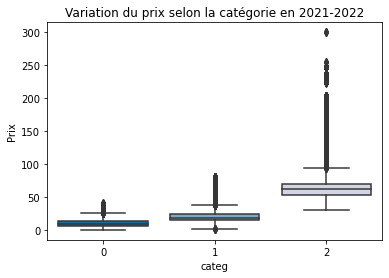

In [84]:
sns.boxplot( data=ventes,x=ventes["categ"], y=ventes["price"],  palette="PuBu_r")
plt.title("Variation du prix selon la catégorie en 2021-2022")
plt.ylabel("Prix")

plt.show()

#### Le lien entre la catégorie de produit et le prix est manifeste. Plus la catégorie est élevée, plus le prix l'est .

### Distribution de la fréquence des achats

<function matplotlib.pyplot.show(close=None, block=None)>

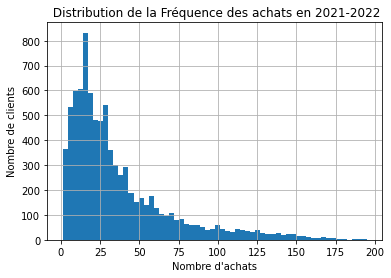

In [85]:
ventes['client_id'].value_counts().hist(bins = 60)
plt.title(" Distribution de la Fréquence des achats en 2021-2022")
plt.xlabel("Nombre d'achats")
plt.ylabel("Nombre de clients")
plt.show

#### La distribution de la fréquence des achats est assymétrique.
#### Il y a une plus forte concentration de clients dans l'achat de produits dont le prix est < à 30€ . 
#### Le nombre de clients décroit en même temps que le prix des produits augmente. 

### Relation entre l'âge et le prix du produit  

-0.1990199383847287


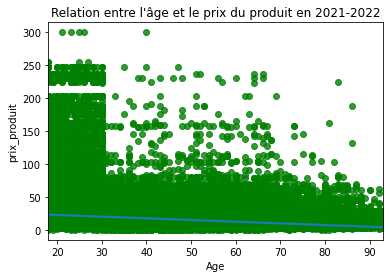

In [86]:
sns.regplot(x=ventes["age"], y=ventes["price"], ci = None,scatter_kws = {"color": "green"})
plt.title("Relation entre l'âge et le prix du produit en 2021-2022")
plt.xlabel("Age")
plt.ylabel("prix_produit")
print(st.pearsonr(ventes["price"], ventes["age"])[0])

#### Les plus jeunes clients [17-30] sont pésents sur une large game de prix, une minorité se distingue en se
#### situant dans les produits les plus couteux, ceux à 300€.

#### Concentration des clients âgés de plus de 30 ans sur les produits dont le prix sont < 100€. Pour les produits dont le prix est >100€, il
#### s'opère une dispersion de ces clients. La majorité d'entre eux achète les produits les moins coûteux. 

### Distribution des prix entre les produits

In [87]:
#Transformation de la table ventes en dataframe
pd.DataFrame(ventes)

,id_prod,date,session_id,client_id,date1,date_year,date_month,price,categ,sex,birth,age
0,0_1483,2021-04-10,s_18746,c_4450,10/04/2021,2021.0,4.0,4.99,0,f,1977,45
1,0_1085,2021-09-29,s_97382,c_4450,29/09/2021,2021.0,9.0,3.99,0,f,1977,45
2,0_1453,2021-08-27,s_81509,c_4450,27/08/2021,2021.0,8.0,7.99,0,f,1977,45
3,0_1405,2021-08-27,s_81509,c_4450,27/08/2021,2021.0,8.0,4.99,0,f,1977,45
4,0_1392,2021-12-28,s_141302,c_4450,28/12/2021,2021.0,12.0,6.30,0,f,1977,45
...,...,...,...,...,...,...,...,...,...,...,...,...
313646,0_2075,2021-10-09,s_102200,c_2793,09/10/2021,2021.0,10.0,8.99,0,m,1933,89
313647,0_1692,2021-09-15,s_90430,c_4478,15/09/2021,2021.0,9.0,13.36,0,f,1970,52
313648,2_162,2021-06-03,s_43342,c_755,03/06/2021,2021.0,6.0,102.82,2,f,1996,26
313649,2_213,2021-12-31,s_142586,c_755,31/12/2021,2021.0,12.0,189.99,2,f,1996,26


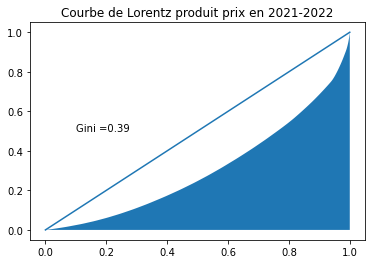

In [88]:
produit = ventes[ventes['price']>0]
produit_prix = produit['price'].values
nb_produit_prix = len(produit_prix)
plt.title("Courbe de Lorentz produit prix en 2021-2022")

C_de_L = np.cumsum(np.sort(produit_prix)) / produit_prix.sum()
C_de_L = np.append([0],C_de_L) # La courbe de Lorenz commence à 0
xaxis = np.linspace(0-1/nb_produit_prix,1+1/nb_produit_prix,nb_produit_prix+1)#Il y a un segment de taille n pour chaque individu, plus 1 segment 
#supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
#plt.plot(xaxis,lorenz,drawstyle='steps-post')

bs = [0.0, 1.0]# bissectrice
plt.plot(bs)
plt.fill_between(np.linspace(0,1,len(C_de_L)), C_de_L)

ssc = (C_de_L.sum() -C_de_L[-1]/2 -C_de_L[0]/2)/nb_produit_prix # Surface sous la courbe de Lorenz. 
#Le premier segment (C_de_L[0]) est à 0,5 en dessous de 0, on le coupe donc en 2, 
#on fait la même chose pour le dernier segment de la courbe de lorenz[-1] qui est à 0,5 au dessus de 1.
esp_entre = 0.5 - ssc # surface entre la bissectrice et la courbe de Lorenz
gini = round(2*esp_entre,2)
plt.text(0.1,0.5,"Gini ="+ str(gini))

plt.show()

#### Le coeficient de gini est assez éloigné de 1, il y a donc une inégale distribution des prix entre les produits. 

# Mission 3

### Relation entre l'âge et la fréquence d’achat  

In [89]:
# création table âge 
age=ventes[["client_id","age"]]
age

,client_id,age
0,c_4450,45
1,c_4450,45
2,c_4450,45
3,c_4450,45
4,c_4450,45
...,...,...
313646,c_2793,89
313647,c_4478,52
313648,c_755,26
313649,c_755,26


In [90]:
#Fréquence des achats par âge 
freq_achat=ventes[["age","session_id"]]
freq_achat['session_id'].value_counts().describe()

count    157808.000000
mean          1.987548
std           1.272775
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          14.000000
Name: session_id, dtype: float64

In [91]:
#frequence achat client 
freq_achat = pd.crosstab(index = ventes["client_id"], columns="total")
freq_achat= pd.merge(freq_achat,age,left_on="client_id", right_on="client_id")

Text(0.5, 0, 'Age')

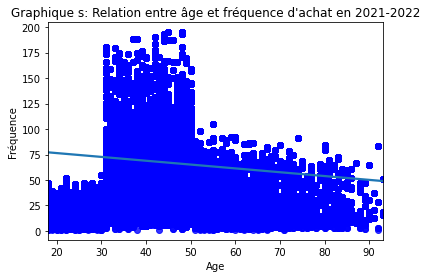

In [92]:
#Représentation graphique de la relation âge et fréquence d'achat
sns.regplot(y=freq_achat["total"], x=freq_achat["age"],ci = None,scatter_kws = {"color": "b"})
plt.title("Graphique s: Relation entre âge et fréquence d'achat en 2021-2022")
plt.ylabel("Fréquence")
plt.xlabel("Age")

In [93]:
#Test de Pearson 
print(st.pearsonr(freq_achat["total"], freq_achat["age"])[0])


-0.11608681317122682


In [94]:
print(st.pearsonr(freq_achat["total"], freq_achat["age"])[1])

0.0


#### le coefficient de pearson est négatif soit, -0.11608681317122682 . Cela traduit une  faible correlation  entre les variables âge et fréquence. La p. value <  0, 05,  permet de rejetter l'hypothèse H0, il y a donc un lien statistique entre les deux variables

### Relation entre le sexe et la catégorie de produit

In [95]:
### Création d'une table de contingence, cont_1
#valeurs_obs
X = "sex"
Y = "categ"


cont_1 = ventes[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len,margins=True,margins_name="Total").fillna(0).copy()

cont_1

categ,0,1,2,Total
sex,,,,
f,101206,53774,8122,163102
m,94064,48851,7634,150549
Total,195270,102625,15756,313651


In [96]:
#Création de la matrice "valeurs attendues"
tx = cont_1.loc[:,["Total"]]
ty = cont_1.loc[["Total"],:]
n = len(ventes)
Table_indep = tx.dot(ty) / n

In [97]:
# Valeurs totales observées
nb_l = len(cont_1)

verif = cont_1.fillna(0)
distance = (verif-Table_indep)**2/Table_indep
xi_n = distance.sum().sum()
table = distance/xi_n

In [98]:
Table_indep

categ,0,1,2,Total
sex,,,,
f,101542.566547,53366.138638,8193.294815,163102.0
m,93727.433453,49258.861362,7562.705185,150549.0
Total,195270.000000,102625.000000,15756.000000,313651.0


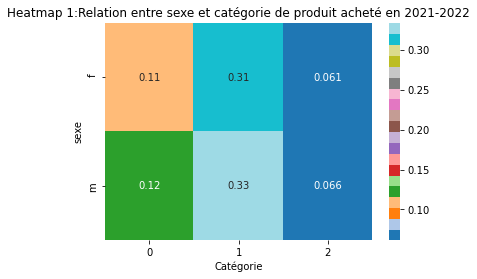

In [99]:
sns.heatmap(table.iloc[:-1,:-1],annot=True,cmap="tab20")
plt.title("Heatmap 1:Relation entre sexe et catégorie de produit acheté en 2021-2022")
plt.ylabel("sexe")
plt.xlabel("Catégorie")
plt.show()

#### Test du khi2

In [100]:
#Calcul de la matrice "écart au carré normalisé de la valeur attendue VS valeur observée"

# Matrice
freq = (cont_1-Table_indep)**2/Table_indep
freq

categ,0,1,2,Total
sex,,,,
f,1.115562,3.117162,0.620379,0.0
m,1.208579,3.377075,0.672107,0.0
Total,0.000000,0.000000,0.000000,0.0


# Calcul du Chi2

In [101]:
#Somme des valeurs de la précédente matrice. Cette somme suit une loi du Chi2 à k degrés de liberté.
#k = observed.size - sum(observed.shape) + observed.ndim - 1 (D'après la documentation de scipy.stats)

chi2 = freq.sum().sum()
chi2

10.11086551372657

In [102]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont_1)
st_chi2

10.110865513726571

#### Le khi2 est de 10.110865513726571.
#### Degré de liberté est égal à (3-1)*(2-1), soit 2
#### La marge d'erreur est de 0,05 qui renvoit à 5,991. 
#### Il y a une corrélation entre les variables sexe et catégorie. 

### Relation entre âge et la taille du panier moyen (en nombre d’articles) 

In [103]:
panier_age = ventes[["session_id","age"]]


panier_age.head(5)

,session_id,age
0,s_18746,45
1,s_97382,45
2,s_81509,45
3,s_81509,45
4,s_141302,45


In [104]:
#Panier moyen
panier_m=ventes[["session_id","price"]]
panier_m1=panier_m.groupby(["session_id"]).sum()

panier_m1 = panier_m1.reset_index()
panier_m1

,session_id,price
0,s_1,11.99
1,s_10,26.99
2,s_100,33.72
3,s_1000,39.22
4,s_10000,41.49
...,...,...
157803,s_99994,28.92
157804,s_99995,19.84
157805,s_99996,56.27
157806,s_99997,6.99


In [105]:
#jointure des tables panier_age et panier_m1 via la méthode merge 
panier_age = pd.merge(panier_age,panier_m1, left_on="session_id", right_on="session_id")
panier_age

,session_id,age,price
0,s_18746,45,24.97
1,s_18746,45,24.97
2,s_18746,45,24.97
3,s_97382,45,16.35
4,s_97382,45,16.35
...,...,...,...
313646,s_102200,89,8.99
313647,s_90430,52,13.36
313648,s_43342,26,102.82
313649,s_142586,26,189.99


-0.2537483623525303


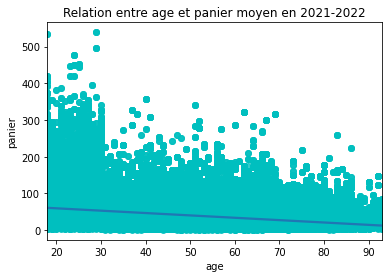

In [106]:
# Relation age et panier moyen
sns.regplot(y=panier_age["price"], x=panier_age["age"],ci = None,scatter_kws = {"color": "c"})
plt.title("Relation entre age et panier moyen en 2021-2022")
plt.ylabel("panier")
plt.xlabel("age")
print(st.pearsonr(panier_age["price"], panier_age["age"])[0])

In [107]:
print(st.pearsonr(panier_age["price"], panier_age["age"])[1])

0.0


#### Le test de pearson est de -0.2537483623525303
#### Il y a une faible corrélaion  ente les variables âge et le panier moyen en nombre de marchandises
#### Cette interprétation est soutenue par la p_value, inférieure à 0,05.

### Relation entre âge et le  montant total des achats 

In [108]:
#Création d'une table ca_age
ca_age_price=ventes[["client_id","price"]]
ca_age_price=ca_age_price.groupby(["client_id"]).sum()
ca_age_price = ca_age_price.reset_index()
ca_age_price.head()

,client_id,price
0,c_1,300.65
1,c_10,586.18
2,c_100,222.87
3,c_1000,980.02
4,c_1001,1102.45


In [109]:
#jointure, via un point merge par âge
ca_age_price=pd.merge(ca_age_price,age,left_on="client_id", right_on="client_id")


Text(0.5, 0, 'Age')

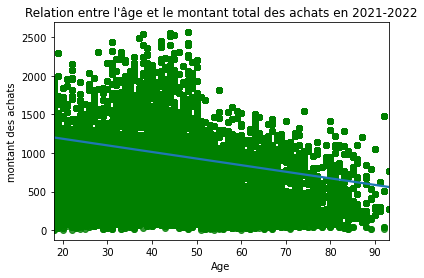

In [110]:
#Relation entre l'âge et le montant total des achats
sns.regplot(y=ca_age_price["price"], x=ca_age_price["age"],ci = None,scatter_kws = {"color": "g"})
plt.title("Relation entre l'âge et le montant total des achats en 2021-2022")
plt.ylabel("montant des achats")
plt.xlabel("Age")

### Test de pearson

In [111]:
print(st.pearsonr(ca_age_price["price"], ca_age_price["age"])[0])

-0.21746995697642102


In [112]:
#p_value
print(st.pearsonr(ca_age_price["price"], ca_age_price["age"])[1])

0.0


#### Le coefficient de pearson est négatif, ce qui indique une faible relation  entre les variables âge et le montant total du panier. La p value conforte cette interprétation.


### Corrélation entre âge et catégories de produits achetés

In [113]:
#valeurs_obs
X = "age"
Y = "categ"

cont = ventes[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy()

tx =ventes [X].value_counts()
ty =ventes [Y].value_counts()

cont = cont.astype(int)
cont

categ,0,1,2
age,,,
18,1668,2759,2921
19,488,817,877
20,498,830,896
21,461,732,839
22,587,791,797
...,...,...,...
89,71,92,1
90,73,85,1
91,36,47,1


In [114]:
#L'âge peut poser un problème dans la lecture des données. 
#Pour contourner ce problème, on peut créer des classe d'âges
gp_1 = ventes['age'] < 30
ventes.loc[gp_1, 'classe_age'] = "classe 1"
gp_2 = (ventes['age'] >= 30 ) & (ventes['age']< 50 )
ventes.loc[gp_2, 'classe_age'] = "classe 2"
gp_3 = ventes['age'] >= 50
ventes.loc[gp_3, 'classe_age'] = "classe 3"

ventes['classe_age'] = ventes['classe_age'].astype('category')

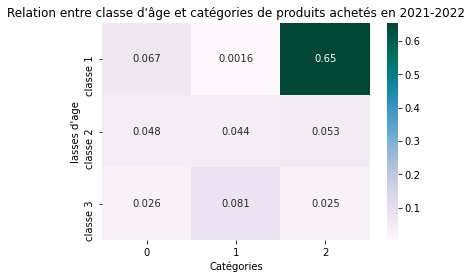

In [115]:
X = "classe_age"
Y = "categ"

cont = ventes[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(ventes)
indep = tx.dot(ty) / n

# On remplace les valeurs nulles par 0
c = cont.fillna(0) 
ecart = (c-indep)**2/indep
xi_n = ecart.sum().sum()
table = ecart/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=True,cmap="PuBuGn")
plt.title("Relation entre classe d'âge et catégories de produits achetés en 2021-2022")
plt.ylabel("lasses d'age")
plt.xlabel("Catégories")
plt.show()

In [116]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont )
st_chi2

123088.41838405657

In [117]:
st_p,

(0.0,)

In [118]:
st_dof

9

In [119]:
st_exp

array([[ 20804.45332551,  10933.87116572,   1678.67550877,
         33417.        ],
       [119237.90056464,  62665.99859398,   9621.10084138,
        191525.        ],
       [ 55227.64610985,  29025.1302403 ,   4456.22364985,
         88709.        ],
       [195270.        , 102625.        ,  15756.        ,
        313651.        ]])

#### Le khi2 est de 137137.97556981342.
#### Le degré de liberté, calculé à partir de la table de contingence cont, est de 150. 
#### Il n'y a pas de correspondance avec la table du khi2. 
#### le nieau élevé du khi2 traduit une forte corrélation entre les variables âge et catégorie.